In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
file = pd.read_csv("game_sales.csv")
df = pd.DataFrame(file)

## El género principal debe ser el que más se vendió en el año 2017 a nivel global.

El genero mas vendido en el año 2017 es: Sports


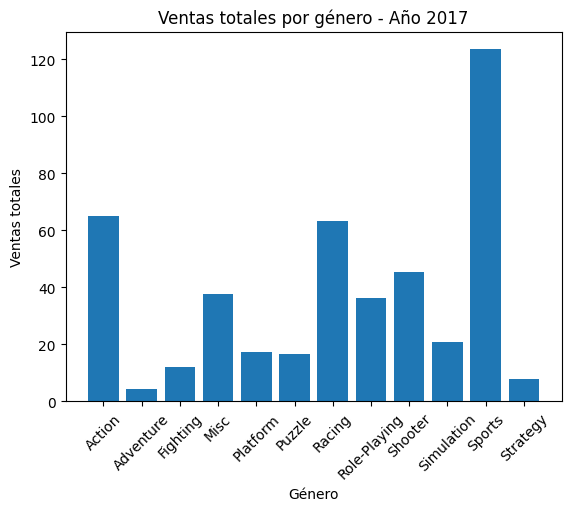

In [12]:
# Calculamos el año
df_year = df[df["Year"] == 2017]

# Agrupamos por genero y ventas globales 
grouped = df_year.groupby("Genre")["Global_Sales"].sum()

# Obtenemos el genero mas vendidio
genre_most_sold = grouped.idxmax()

print(f"El genero mas vendido en el año 2017 es: {genre_most_sold}")

# Graficamos los datos
plt.bar(grouped.index, grouped.values)
plt.xlabel('Género')
plt.ylabel('Ventas totales')
plt.title(f'Ventas totales por género - Año {year}')
plt.xticks(rotation=45)
plt.show()

## El subgénero debe ser el que obtuvo el 5to lugar de ventas el año 2020 en EU.

El subgénero en el 5to lugar de ventas en Europa (EU) en el año 2020 es: Role-Playing


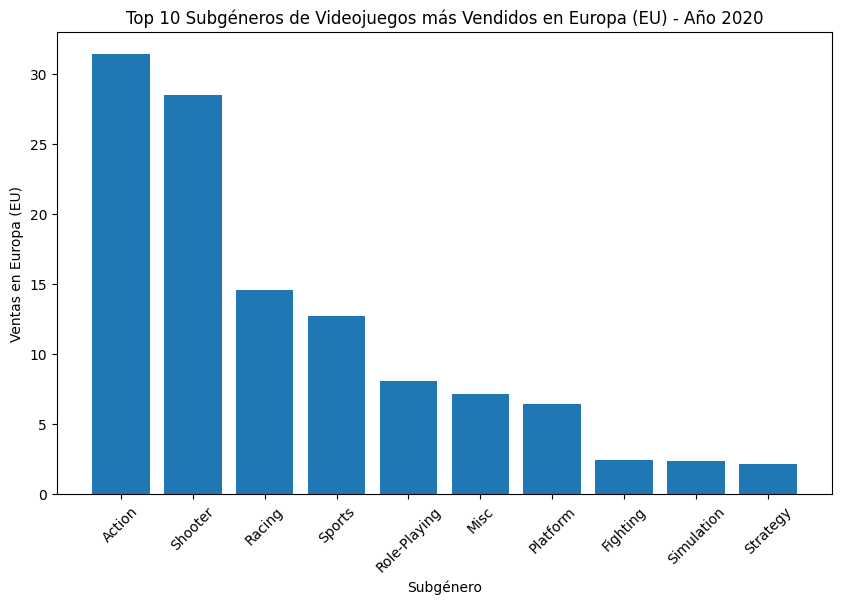

In [15]:
# Filtrar los datos para el año 2020 y Europa (EU)
df_2020_eu = df[(df['Year'] == 2020) & (df['EU_Sales'] > 0)]

# Ordenar los datos por ventas en Europa (EU) de forma descendente
df_2020_eu_sorted = df_2020_eu.sort_values(by='EU_Sales', ascending=False)

# Obtener el subgénero en el 5to lugar de ventas en Europa (EU)
subgenre_5th = df_2020_eu_sorted.iloc[4]['Genre']

# Imprimir el subgénero en el 5to lugar de ventas en Europa (EU)
print(f"El subgénero en el 5to lugar de ventas en Europa (EU) en el año 2020 es: {subgenre_5th}")

# Obtener los datos de ventas de los subgéneros en Europa (EU) en el año 2020
sales_data = df_2020_eu_sorted.head(10)[['Genre', 'EU_Sales']]

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sales_data['Genre'], sales_data['EU_Sales'])
plt.xlabel('Subgénero')
plt.ylabel('Ventas en Europa (EU)')
plt.title('Top 10 Subgéneros de Videojuegos más Vendidos en Europa (EU) - Año 2020')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


## La inversión de la publicidad debe ser repartida en base al porcentaje de ventas que tuvieron cada una de las regiones durante todos los años.

NA_Sales         56828.38
EU_Sales         34008.72
JP_Sales          9162.90
Global_Sales    100000.00
dtype: float64


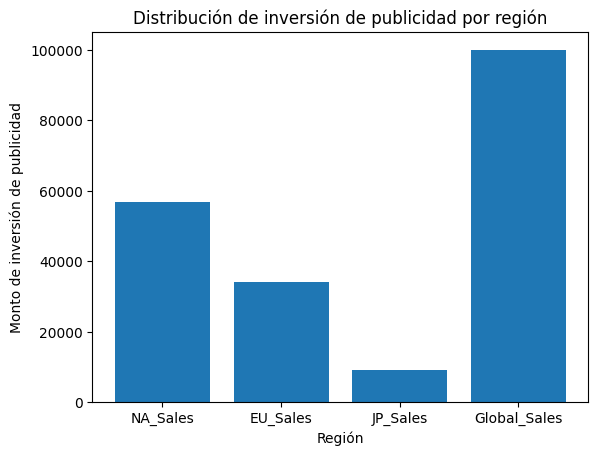

In [23]:
# Calcular ventas totales por region
region_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]].sum()

# Calcular el % de ventas por region
region_sales_percentage = region_sales / region_sales["Global_Sales"] * 100

# Definir el presupuesto de publicidad
advertising_budget = 100000 # Ejemplo de presupuesto de publicidad

# Calcular el monto de inversion de publicidad por region
advertising_investment = advertising_budget * (region_sales_percentage / 100)
redondeo = round(advertising_investment, 2)

print(redondeo)

# Graficar los montos de inversión de publicidad por región
plt.bar(advertising_investment.index, advertising_investment.values)
plt.xlabel('Región')
plt.ylabel('Monto de inversión de publicidad')
plt.title('Distribución de inversión de publicidad por región')
plt.show()